In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import itertools
from itertools import combinations, product
from scipy.stats import ttest_ind
import random

### Далее в ноутбуке меткой  "<span style='color:red'>Модификация &#8595;</span>" обозначены изменяющие датафрейм действия

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

### <span style='color:blue'>Читаем файл &#8595;</span>

In [2]:
stud = pd.read_csv('stud_math.csv')

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.expand_frame_repr', True)

In [4]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [5]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
# Сначала разберемся со странной колонкой 'studytime, granular'.
# Судя по названию, она как-то связана с 'studytime'

stud[['studytime', 'studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


### <span style='color:red'>Модификация &#8595;</span>

In [7]:
# Да, коррелирует на 100%. Выкинем ее.
# И сделаем названия всех колонок в нижнем регистре.

if 'studytime, granular' in stud.columns:
    stud.drop(['studytime, granular'], inplace = True, axis = 1)

stud.columns = [column.lower() for column in stud.columns]

In [8]:
# Обозначим Числовые, Номинативные и Категориальные признаки

numerical = ['score', 'age', 'absences']
nominative = ['school', 'guardian', 'mjob', 'fjob']
categorical = ['medu', 'fedu', 'sex', 'address', 'famsize', 'pstatus',
       'reason',  'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health']

print(f'Числовые признаки:\n{numerical}\n')
print(f'Номинативные признаки:\n{nominative}\n')
print(f'Катигориальные признаки:\n{categorical}\n')

# Проверим, что ничего не потеряли
print(sorted(numerical + nominative + categorical) == sorted(stud.columns))

Числовые признаки:
['score', 'age', 'absences']

Номинативные признаки:
['school', 'guardian', 'mjob', 'fjob']

Катигориальные признаки:
['medu', 'fedu', 'sex', 'address', 'famsize', 'pstatus', 'reason', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']

True


# Числовые признаки
---

In [9]:
numerical

['score', 'age', 'absences']

## score
### баллы по госэкзамену по математике

### <span style='color:red'>Модификация &#8595;</span>

In [10]:
# Это целевая переменная, с нее и начнем.
# Сразу выкинем строки, где целевая переменная score пустая

print("Перед удалением:", len(stud))
stud.drop(stud[stud.score.isna()].index, inplace=True)
print("После удаления:", len(stud))

Перед удалением: 395
После удаления: 389


50.0     13.9
55.0     11.8
0.0       9.5
75.0      8.5
65.0      8.0
40.0      8.0
60.0      8.0
70.0      6.9
45.0      6.9
80.0      4.1
30.0      3.9
90.0      3.1
35.0      2.3
25.0      1.8
85.0      1.5
95.0      1.3
100.0     0.3
20.0      0.3
Name: score, dtype: float64

<AxesSubplot:>

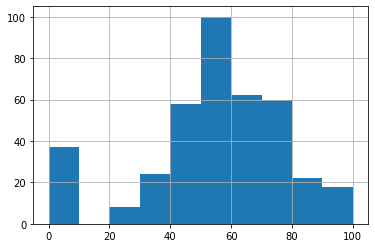

In [11]:
display(round(stud.score.value_counts(normalize=True)*100, 1))
stud.score.hist()

### <span style='color:red'>Модификация &#8595;</span>

In [12]:
# Нули выбиваются из нормального распределения, но их уж очень много (10%).
# Врядли ученик получит ноль баллов, если вообще проходит тест.
# Возможно, это те ученики, которые по каким-то причинам "проштрафились" во время теста.
# Например, им поставили ноль за то, что они списывали.
# Оставим эти нули и введем новый признак 'penalty' по предположению, что это "нечестные" ученики.

stud['penalty'] = stud.score.apply(lambda score: 'yes' if score == 0 else 'no')
if 'penalty' not in categorical:
    categorical.append('penalty')

## age
#### возраст ученика (от 15 до 22)

In [13]:
stud.age.value_counts(dropna=False)

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

<AxesSubplot:>

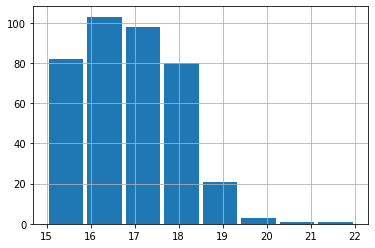

In [14]:
# Пустот нет, посмотрим распределение

stud.age.hist(bins=stud.age.value_counts().size, rwidth=0.9)

In [15]:
# Выбросы по age

age_q1 = stud.age.quantile(.25)
age_q3 = stud.age.quantile(.75)
age_iqr = age_q3 - age_q1
age_left = age_q1 - age_iqr*1.5
age_right = age_q3 + age_iqr*1.5

print("Пределы выбросов по 'age': ({}, {})".format(age_left, age_right))
print("Число строк за пределами ", len(stud[~stud.age.between(age_left, age_right)]))

Пределы выбросов по 'age': (13.0, 21.0)
Число строк за пределами  1


In [16]:
# Результат экзамены для строк в выбросах (там один "возростной" ученик, 22 года)

stud[~stud.age.between(age_left, age_right)][['age', 'score']]

,age,score
247,22,40.0


### <span style='color:red'>Модификация &#8595;</span>

In [17]:
# Выкидываем строку, что за пределами выбросов по age
# Видимо, это какой-то уникальный "второгодник", который плохо подойдет для модели

print("Перед удалением:", len(stud))
stud.drop(
    stud[ ~stud.age.between(age_left, age_right) ].index,
    inplace=True
)
print("После удаления:", len(stud))

Перед удалением: 389
После удаления: 388


## absences
### количество пропущенных занятий

Число пустых: 11


(-0.386, 38.5]    371
(38.5, 77.0]        4
(346.5, 385.0]      1
(192.5, 231.0]      1
(308.0, 346.5]      0
(269.5, 308.0]      0
(231.0, 269.5]      0
(154.0, 192.5]      0
(115.5, 154.0]      0
(77.0, 115.5]       0
Name: absences, dtype: int64

<AxesSubplot:>

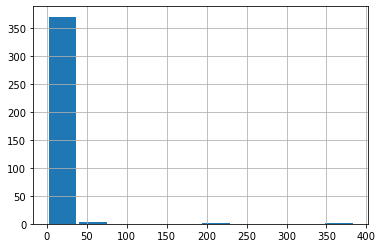

In [18]:
print('Число пустых: {}'.format(sum(stud.absences.isna())))

display(stud.absences.value_counts(bins=10))
stud.absences.hist(bins=10, rwidth=0.9)

Пределы выбросов по 'absences': (-12.0, 20.0)
Число строк за пределами (-12.0, 20.0): 17


<AxesSubplot:>

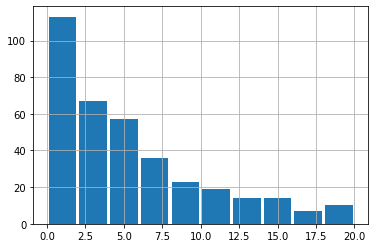

In [19]:
# Очень мало строк по ученикам, которые отсутствовали более 25 дней.
# Думаю, что те двое, кто отсутствовал более 200 раз, нужно убрать из модели сразу.
# Но, посчитаем еще и выбросы.

abs_q1 = stud.absences.quantile(.25)
abs_q3 = stud.absences.quantile(.75)
abs_iqr = abs_q3 - abs_q1
abs_left = abs_q1 - abs_iqr*1.5
abs_right = abs_q3 + abs_iqr*1.5

print("Пределы выбросов по 'absences': ({}, {})".format(abs_left, abs_right))
print(f"Число строк за пределами ({abs_left}, {abs_right}):",
      len(stud[stud.absences > abs_right])
)
stud[stud.absences.between(abs_left, abs_right)].absences.hist(
    rwidth=0.9)

### <span style='color:red'>Модификация &#8595;</span>

In [20]:
# Так мне больше нравится. Не знаю, правильно это или нет, но пусть остануться в выборке те,
# что меньше 30, а не меньше 20. Выкинем только 7 строк, которые больше 30.

print("Перед удалением:", len(stud))
stud.drop(
    stud[ ~stud.absences.between(abs_left, abs_right) ].index,
    inplace=True
)
print("После удаления:", len(stud))

Перед удалением: 388
После удаления: 360


# Номинативные и Катигориальные признаки
---

In [21]:
print(nominative)

['school', 'guardian', 'mjob', 'fjob']


In [22]:
print(categorical)

['medu', 'fedu', 'sex', 'address', 'famsize', 'pstatus', 'reason', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'penalty']


## school
### аббревиатура школы, в которой учится ученик

In [23]:
stud.school.value_counts(dropna=False)

GP    317
MS     43
Name: school, dtype: int64

In [24]:
# Статистика всего по двум школам...
# Как-то маловато для "миссии повышения уровня благополучия детей по всему миру" :)

## sex
### пол ученика ('F' - женский, 'M' - мужской)

In [25]:
stud.sex.value_counts(dropna=False)

F    188
M    172
Name: sex, dtype: int64

In [26]:
# Тут все хорошо

## medu
#### образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [27]:
stud.medu.value_counts(dropna=False)

4.0    121
2.0     93
3.0     87
1.0     53
0.0      3
NaN      3
Name: medu, dtype: int64

In [28]:
# medu пустоты пока оставляем, как есть

## fedu
### образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [29]:
stud.fedu.value_counts(dropna=False)

2.0     98
3.0     85
4.0     79
1.0     72
NaN     23
0.0      2
40.0     1
Name: fedu, dtype: int64

### <span style='color:red'>Модификация &#8595;</span>

In [30]:
# Явно некорректное значение 40. Сотрем его

stud.fedu = stud.fedu.apply(lambda fedu: np.NaN if fedu > 4 else fedu)

In [31]:
# Теперь посмотрим на корреляцию между 'fedu' и 'medu'

stud[['fedu', 'medu']].corr()

,fedu,medu
fedu,1.000000,0.633681
medu,0.633681,1.000000


In [32]:
# Корреляция между 'fedu' и 'medu' довольно заметная.
# Значит пустоты 'fedu' можно не выкидывать, а заполнить значением 'medu'.
# И наоборот, пустоты 'medu' заполнить из 'fedu'.

# Действительно, вполне можно допустить, что в семье родители часто одного уровня образования.
# Оценим, можно ли это сделать. Не будет ли такого, что обе колонки пустые:

print("Строк с одновременно пустыми 'fedu' и 'medu':", len(stud[(stud.fedu.isna())&(stud.medu.isna())]))

Строк с одновременно пустыми 'fedu' и 'medu': 0


In [33]:
# С другой стороны, возможно, что второго родителя у ученика вообще нет. 
# Например -- мать одиночка без известного отца.
# Попробуем дополнительно ориентироваться, что pstatus ученика имеет значение 'T'.
# Либо ориентироваться на то, что ученик с пустой колонков xedu одного родителя имеет НЕпустой xjob
# другого родителя, и этот непустой xjob отличен от 'other'.
# Посмотрим сколько строк удовлетворяют данному критерию: 

print("Число пустых 'fedu':", len(stud[(stud.fedu.isna())]))
print("Число пустых 'fedu', которым можно дать значение 'medu':", len(stud[
    (stud.fedu.isna()) \
    & (
        ( (~stud.mjob.isna()) & (stud.mjob!='other') )
        | (stud.pstatus=='T')
    )
]))

print("Число пустых 'medu':", len(stud[(stud.medu.isna())]))
print("Число пустых 'medu', которым можно дать значение 'fedu':", len(stud[
    (stud.medu.isna()) \
    & (
        ( (~stud.fjob.isna()) & (stud.fjob!='other') )
        | (stud.pstatus=='T')
    )
]))

Число пустых 'fedu': 24
Число пустых 'fedu', которым можно дать значение 'medu': 22
Число пустых 'medu': 3
Число пустых 'medu', которым можно дать значение 'fedu': 3


### <span style='color:red'>Модификация &#8595;</span>

In [34]:
# Отлично. Только 2 строки придется выкинуть, а остальным дадим "соседние" значения.

def fillna_edu(row, edu, base_edu, base_job):
    """
    Функция для apply для заполнения пустого Xedu
    на основе pstatus, Yedu и Yjob
    """
    if pd.isnull(row[edu]):
        if row['pstatus'] == 'T' or (not pd.isnull(row[base_job]) and row[base_job] != 'other'):
            return row[base_edu]
        else:
            return row[edu]
    else:
        return row[edu]


stud.medu = stud.apply(fillna_edu, edu='medu',
                       base_edu='fedu', base_job='fjob', axis=1)
stud.fedu = stud.apply(fillna_edu, edu='fedu',
                       base_edu='medu', base_job='mjob', axis=1)

# И удаляем строки, в которых остались пустые medu или fedu 
print("Перед удалением:", len(stud))
stud.drop(
    stud[(stud.medu.isna()) | (stud.fedu.isna())].index,
    inplace=True
)
print("После удаления:", len(stud))

Перед удалением: 360
После удаления: 358


## mjob
### работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

## fjob
### работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [35]:
stud.mjob.value_counts(dropna=False)

other       116
services     87
at_home      55
teacher      52
health       32
NaN          16
Name: mjob, dtype: int64

In [36]:
stud.fjob.value_counts(dropna=False)

other       181
services     88
NaN          34
teacher      25
at_home      16
health       14
Name: fjob, dtype: int64

### <span style='color:blue'>Создаем функции &#8595;</span>

In [37]:
# Попробуем в сторке с пустым mjob заполнить его на основе непустого medu.
# Для начала возмем все данные и составим распределение количетва medu относительно mjob.
# Будем использовать это распределение, как базу для заполнения пустых mjob случацными числами с весом.
# Вес -- это будет medu из созданного распределения medu->mjob.
# То же самое сделаем для fjob на основе fedu

def stat_one_to_other(one, other):
    """
    Функция делает статистику по распределению одной колонки (one)
    относительно другой (other)
    """
    return {
        x: stud[stud[one] == x][other].value_counts(normalize=True)
        for x in stud[one].dropna().unique()
    }



def fillna_one_by_other(row, one, other, other_map):
    """
    Функция для apply для заполнения одного пустого поля (one)
    случайными данными, но на основе карты с весам по статистическим данным (other_map)
    другого поля (other)
    """
    if pd.isnull(row[one]):
        if pd.isnull(row[other]): # значение из обоих колонок пустое 
            return row[one]
        else:
            stat = other_map[row[other]]
            return random.choices(stat.index, stat)[0]
    else:
        return row[one]

### <span style='color:red'>Модификация &#8595;</span>

In [38]:
# Словарь с medu и их весами относительно mjob
medu_to_mjob = stat_one_to_other('medu', 'mjob')

# Словарь с fedu и их весами относительно fjob
fedu_to_fjob = stat_one_to_other('fedu', 'fjob')


random.seed(1)  # задаем зерно для повторяемости
stud.mjob = stud.apply(fillna_one_by_other, one='mjob',
                       other='medu', other_map=medu_to_mjob, axis=1)

random.seed(1)  # задаем зерно для повторяемости
stud.fjob = stud.apply(fillna_one_by_other, one='fjob',
                       other='fedu', other_map=fedu_to_fjob, axis=1)

# После этого пустых mjob и fjob не должно быть

display(stud.mjob.value_counts(dropna=False))
display(stud.fjob.value_counts(dropna=False))

other       124
services     88
at_home      59
teacher      54
health       33
Name: mjob, dtype: int64

other       203
services     95
teacher      27
at_home      17
health       16
Name: fjob, dtype: int64

## guardian
### опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [39]:
stud.guardian.value_counts(dropna=False)

mother    225
father     83
NaN        30
other      20
Name: guardian, dtype: int64

### <span style='color:red'>Модификация &#8595;</span>

In [40]:
# Попробуем распределить пустых опекунов в зависимости от статистики pstatus

pst_to_guard = stat_one_to_other('pstatus', 'guardian')

random.seed(1)  # задаем зерно для повторяемости
stud.guardian = stud.apply(fillna_one_by_other, one='guardian',
                       other='pstatus', other_map=pst_to_guard, axis=1)

# И удаляем строки, в которых остались пустые guardian
print("Перед удалением:", len(stud))
stud.drop(
    stud[stud.guardian.isna()].index,
    inplace=True
)
print("После удаления:", len(stud))

Перед удалением: 358
После удаления: 356


## famsize
### размер семьи('LE3' <= 3, 'GT3' >3)

In [41]:
stud.famsize.value_counts(dropna=False)

GT3    236
LE3     98
NaN     22
Name: famsize, dtype: int64

### <span style='color:red'>Модификация &#8595;</span>

In [42]:
# Заполним пустоты famsize так же на основе статистики pstatus

pst_to_size = stat_one_to_other('pstatus', 'famsize')

random.seed(1)  # задаем зерно для повторяемости
stud.famsize = stud.apply(fillna_one_by_other, one='famsize',
                          other='pstatus', other_map=pst_to_size, axis=1)

# И удаляем строки, в которых остались пустые famsize
print("Перед удалением:", len(stud))
stud.drop(
    stud[stud.famsize.isna()].index,
    inplace=True
)
print("После удаления:", len(stud))

Перед удалением: 356
После удаления: 353


## famrel
### семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [43]:
stud.famrel.value_counts(dropna=False)

 4.0    162
 5.0     89
 3.0     54
 NaN     26
 2.0     14
 1.0      7
-1.0      1
Name: famrel, dtype: int64

### <span style='color:red'>Модификация &#8595;</span>

In [44]:
# Сразу сбросим отрицательное значение в NaN

stud.famrel = stud.famrel.apply(lambda famrel: np.NaN if famrel < 0 else famrel)

### <span style='color:red'>Модификация &#8595;</span>

In [45]:
# Можно попробовать заполнить пустоты famrel на основе статистики pstatus * age
# Логично предположить, что на отношения в семье влияют возраст ученика и то,
# вместе или раздельно живут родители

pst_to_fmrl = stat_one_to_other('pstatus', 'famrel')

age_to_fmrl = stat_one_to_other('age', 'famrel')

# Сделаем статистику для пары pstatus age путем перемножения их вероятностей
pst_age_to_fmrl = {
    ap: age_to_fmrl[ap[0]] * pst_to_fmrl[ap[1]]
    for ap in product(age_to_fmrl, pst_to_fmrl)
}


def fillna_one_by_others2(row, one, other1, other2, other_map):
    """
    Функция для apply для заполнения одного пустого поля (one)
    случайными данными, но на основе карты с весам по статистическим данным (other_map)
    двух других полей (other1, other2)
    """
    if pd.isnull(row[one]):
        if pd.isnull(row[other1]) or pd.isnull(row[other2]):
            return row[one]
        else:
            stat = other_map[(row[other1], row[other2])]
            return random.choices(stat.index, stat)[0]
    else:
        return row[one]


random.seed(1)  # задаем зерно для повторяемости
stud.famrel = stud.apply(fillna_one_by_others2, one='famrel',
                         other1='age', other2='pstatus', other_map=pst_age_to_fmrl, axis=1)

# И удаляем строки, в которых остались пустые famsize
print("Перед удалением:", len(stud))
stud.drop(
    stud[stud.famrel.isna()].index,
    inplace=True
)
print("После удаления:", len(stud))

Перед удалением: 353
После удаления: 352


## pstatus
### статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [46]:
stud.pstatus.value_counts(dropna=False)

T      290
NaN     32
A       30
Name: pstatus, dtype: int64

### <span style='color:red'>Модификация &#8595;</span>

In [47]:
# Заполним пустые pstatus просто значениями U (неизвестно, unknown)

stud.pstatus = stud.pstatus.apply(lambda pstatus: 'U' if pd.isnull(pstatus) else pstatus)

## traveltime
### время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

## address
### тип адреса ученика ('U' - городской, 'R' - за городом)

In [48]:
stud.traveltime.value_counts(dropna=False)

1.0    215
2.0     83
NaN     26
3.0     21
4.0      7
Name: traveltime, dtype: int64

In [49]:
stud.address.value_counts(dropna=False)

U      261
R       77
NaN     14
Name: address, dtype: int64

### <span style='color:red'>Модификация &#8595;</span>

In [50]:
# Логично предположить, что между временем в пути и типом адреса может быть связь.
# Если ученик живет за городом, то ему дольше добираться до школы.
# Попробуем на основе этого предположения взаимозаполнить пустоты в traveltime и address
# Тоже случайными числами с весами
# Ну, а если будет так, что и address и traveltime пустые, то такие строки удалим

addr_to_time = stat_one_to_other('address', 'traveltime')

time_to_addr = stat_one_to_other('traveltime', 'address')

random.seed(1)  # задаем зерно для повторяемости
stud.address = stud.apply(fillna_one_by_other, one='address',
                          other='traveltime', other_map=time_to_addr, axis=1)

random.seed(1)  # задаем зерно для повторяемости
stud.traveltime = stud.apply(fillna_one_by_other, one='traveltime',
                             other='address', other_map=addr_to_time, axis=1)

# Удаляем строки, у которых одновременно пустые traveltime и address
print("Перед удалением:", len(stud))
stud.drop(
    stud[(stud.traveltime.isna()) & (stud.address.isna())].index,
    inplace=True
)
print("После удаления:", len(stud))

Перед удалением: 352
После удаления: 349


## freetime
### свободное время после школы (от 1 - очень мало до 5 - очень мого)

## goout
### проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [51]:
stud.freetime.value_counts(dropna=False)

3.0    139
4.0    100
2.0     54
5.0     34
1.0     15
NaN      7
Name: freetime, dtype: int64

In [52]:
stud.goout.value_counts(dropna=False)

3.0    116
2.0     91
4.0     74
5.0     42
1.0     20
NaN      6
Name: goout, dtype: int64

In [53]:
# Предположим, что свободное время напрямую влияет на время, проводимое с друзьями

stud[['goout', 'freetime']].corr()

,goout,freetime
goout,1.000000,0.301383
freetime,0.301383,1.000000


In [54]:
# Число одновременно пустых goout и freetime

len(stud[(stud.goout.isna())&(stud.freetime.isna())])

0

### <span style='color:red'>Модификация &#8595;</span>

In [55]:
# Взаимозачтем пустые значения этих двух колонок
# Чем больше одно, тем меньше другое

stud.goout = stud.apply(
    lambda row: 6-row['freetime'] if pd.isnull(row['goout']) else row['goout'], axis=1)

stud.freetime = stud.apply(
    lambda row: 6-row['goout'] if pd.isnull(row['freetime']) else row['freetime'], axis=1)

# Теперь пустых goout и freetime не должно быть

display(stud.goout.value_counts(dropna=False))
display(stud.freetime.value_counts(dropna=False))

3.0    120
2.0     92
4.0     74
5.0     43
1.0     20
Name: goout, dtype: int64

3.0    141
4.0    104
2.0     54
5.0     35
1.0     15
Name: freetime, dtype: int64

## activities
### дополнительные внеучебные занятия (yes или no)

## schoolsup
### дополнительная образовательная поддержка (yes или no)

In [56]:
stud.activities.value_counts(dropna=False)

yes    177
no     159
NaN     13
Name: activities, dtype: int64

In [57]:
stud.schoolsup.value_counts(dropna=False)

no     296
yes     44
NaN      9
Name: schoolsup, dtype: int64

### <span style='color:red'>Модификация &#8595;</span>

In [58]:
# Наверно, если есть образовательная поддержка, то есть и дополнительные внеучебные занятия.
# Взаимозаполним пустоты activities и schoolsup по этому принципу

stud.activities = stud.apply(lambda row: row['schoolsup'] if pd.isnull(
    row['activities']) else row['activities'], axis=1)

stud.schoolsup = stud.apply(lambda row: row['activities'] if pd.isnull(
    row['schoolsup']) else row['schoolsup'], axis=1)

# И проверим пустоты еще раз
display(stud.activities.value_counts(dropna=False))
display(stud.schoolsup.value_counts(dropna=False))

yes    183
no     166
Name: activities, dtype: int64

no     303
yes     46
Name: schoolsup, dtype: int64

## famsup
### семейная образовательная поддержка (yes или no)

In [59]:
stud.famsup.value_counts(dropna=False)

yes    196
no     120
NaN     33
Name: famsup, dtype: int64

### <span style='color:red'>Модификация &#8595;</span>

In [60]:
# Заполним пустоты famsup на основании образования родителей -- более образованные родители
# желают иметь так же образованных детей.
# Если сумма "образованности" родителей больше 6 (один из родителей имеет высшее, а другой
# на один бал ниже), то поддержка есть.

stud.famsup = stud.apply(lambda row: ('yes' if row['fedu']+row['medu'] > 6
                                      else 'no') if pd.isnull(row['famsup']) else row['famsup'], axis=1)

# Проверим, что теперь нет пустот в famsup
stud.famsup.value_counts(dropna=False)

yes    207
no     142
Name: famsup, dtype: int64

## paid
### дополнительные платные занятия по математике (yes или no)

In [61]:
stud.paid.value_counts(dropna=False)

no     180
yes    133
NaN     36
Name: paid, dtype: int64

### <span style='color:red'>Модификация &#8595;</span>

In [62]:
# Для заполнения пустот paid предположим, что если есть семейная или школьная поддержка,
# то есть и платные занятия. Если поддержки никакой нет, то нет и платных занятий.

stud.paid = stud.apply(
    lambda row: ('yes' if row['famsup'] ==
                 'yes' or row['schoolsup'] == 'yes' else 'no')
    if pd.isnull(row['paid']) else row['paid'], axis=1)

# И посмотрим на результат
stud.paid.value_counts(dropna=False)

no     190
yes    159
Name: paid, dtype: int64

## higher
### хочет получить высшее образование (yes или no)

In [63]:
stud.higher.value_counts(dropna=False)

yes    317
NaN     18
no      14
Name: higher, dtype: int64

### <span style='color:red'>Модификация &#8595;</span>

In [64]:
# Пустоты higher заполним по принципу наличия либо платных занятий,
# либо дополнительных занятий

stud.higher = stud.apply(
    lambda row: ('yes' if row['paid'] ==
                 'yes' or row['activities'] == 'yes' else 'no')
    if pd.isnull(row['higher']) else row['higher'], axis=1)

# И посмотрим на результат
stud.higher.value_counts(dropna=False)

yes    328
no      21
Name: higher, dtype: int64

## reason
### причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [65]:
stud.reason.value_counts(dropna=False)

course        125
reputation     91
home           87
other          30
NaN            16
Name: reason, dtype: int64

### <span style='color:red'>Модификация &#8595;</span>

In [66]:
# Заполним пустоты reason на основе higher, schoolsup и traveltime

def fillna_reason(row):
    if pd.isnull(row['reason']):
        if row['higher'] == 'yes':
            return 'course'
        elif row['schoolsup'] == 'yes':
            return 'reputation'
        elif row['traveltime'] == 1:
            return 'home'
        else:
            return 'other'
    else:
        return row['reason']


stud.reason = stud.apply(fillna_reason, axis=1)

## studytime
### время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [67]:
stud.studytime.value_counts(dropna=False)

2.0    169
1.0     92
3.0     56
4.0     27
NaN      5
Name: studytime, dtype: int64

### <span style='color:red'>Модификация &#8595;</span>

In [68]:
# Пустот мало по studytime. Заполним их просто случайными на основе статистики.

def fillna_random(column):
    col = stud[column].value_counts(normalize=True)

    random.seed(1)  # задаем зерно для повторяемости
    stud[column] = stud[column].apply(
    lambda x: random.choices(col.index, col)[0] if pd.isnull(x) else x)

fillna_random('studytime')

## nursery
### посещал детский сад (yes или no)

## health
### текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

## internet
### наличие интернета дома (yes или no)

## failures
### количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

## romantic
### в романтических отношениях (yes или no)

In [69]:
stud.nursery.value_counts(dropna=False)

yes    269
no      65
NaN     15
Name: nursery, dtype: int64

In [70]:
stud.health.value_counts(dropna=False)

5.0    123
3.0     79
4.0     53
1.0     40
2.0     39
NaN     15
Name: health, dtype: int64

In [71]:
stud.internet.value_counts(dropna=False)

yes    265
no      52
NaN     32
Name: internet, dtype: int64

In [72]:
stud.failures.value_counts(dropna=False)

0.0    266
1.0     41
NaN     19
3.0     12
2.0     11
Name: failures, dtype: int64

In [73]:
stud.romantic.value_counts(dropna=False)

no     214
yes    106
NaN     29
Name: romantic, dtype: int64

### <span style='color:red'>Модификация &#8595;</span>

In [74]:
# Пустоты в nursery, health, internet, failures и romantic заполним так же случайными на основе статистики.

for column in ['nursery', 'health', 'internet', 'failures', 'romantic']:
    fillna_random(column)

### <span style='color:blue'>Анализ &#8595;</span>

In [75]:
def get_stat_dif(df, column, target):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        pv = ttest_ind(df.loc[df.loc[:, column] == comb[0], target], 
                        df.loc[df.loc[:, column] == comb[1], target]).pvalue
        if pv <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            return column

In [76]:
nom_cat_interest = []
for col in nominative + categorical:
    col = get_stat_dif(stud, col, 'score')
    if col:
        nom_cat_interest.append(col)

Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки penalty


### <span style='color:blue'>Оставляем для дальнейшей работы эти колонки &#8595;</span>

In [77]:
interest = numerical + nom_cat_interest
print(interest)

['score', 'age', 'absences', 'mjob', 'medu', 'sex', 'address', 'failures', 'higher', 'romantic', 'penalty']


In [78]:
stud_interest = stud[interest]

In [79]:
stud_interest

,score,age,absences,mjob,medu,sex,address,failures,higher,romantic,penalty
0,30.0,18,6.0,at_home,4.0,F,U,0.0,yes,no,no
1,30.0,17,4.0,at_home,1.0,F,U,0.0,yes,no,no
2,50.0,15,10.0,at_home,1.0,F,U,3.0,yes,no,no
3,75.0,15,2.0,health,4.0,F,U,0.0,yes,yes,no
4,50.0,16,4.0,other,3.0,F,U,0.0,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...
389,0.0,18,0.0,other,1.0,F,U,1.0,yes,no,yes
391,80.0,17,3.0,services,3.0,M,U,0.0,yes,no,no
392,35.0,21,3.0,other,1.0,M,R,3.0,no,no,no
393,50.0,18,0.0,services,3.0,M,R,0.0,yes,no,no


### <span style='color:blue'>Выводы &#8595;</span>

1. убрана колонка ***studytime, granular***, полностью коррелирующая с колонкой ***studytime***;
1. большинство строк с пустыми ячейками были не выкинуты, а заполнены случайными значениями на основе весов других признаков;
1. добавлена новый признак ***penalty*** на основе предположения, что ученики, получившие 0 баллов, получили их по административным причинам, например, были уличины в списывании;
1. удалены выбросы по числовым колонкам;
1. по номинативным колонкам проведен анализ и оставлены значимые колонки.

Итого оставлены 349 строки c колонками:
- score
- age
- absences
- mjob
- medu
- sex
- address
- failures
- higher
- romantic
- penalty